In [3]:
import h5py, numpy as np, matplotlib.pyplot as plt

In [22]:
with h5py.File('sigres.h5','r') as ipt:
    sigres = ipt['evtinfo'][:]

In [23]:
with h5py.File('bkgres.h5','r') as ipt:
    bkgres = ipt['evtinfo'][:]

## nMichel=2,qEdep(200,600),eDepR(,17500],michelDist(,800],E1(20,240),E2(85,430)
### nTagR<700,chisquare>1.1,FitTime>5.1
+ sig: 202 0.0202
+ bkg: 0

In [8]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
jet = plt.cm.jet
newcolors = jet(np.linspace(0, 1, 32768))
white = np.array([1, 1, 1, 0.5])
newcolors[0, :] = white
cmap = ListedColormap(newcolors)

In [6]:
def e1e2(info,xname='E1',yname='E2',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=17000,name='bkg'):
    fig,ax=plt.subplots()
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    fig.colorbar(h[3])
    ax.set_title('nMichel:{} edepR<{} Qedep[{},{}] nCap(,{}] michelR({}] entries:{}'.format(nm,eRr,qel,qer,nCr,mRr,len(info[index])))
    plt.savefig('compare/{}{}{}Nm{}EdepR{}Qedep{}-{}nC-{}mD-{}.png'.format(name,xname,yname,nm,eRr,qel,qer,nCr,mRr))

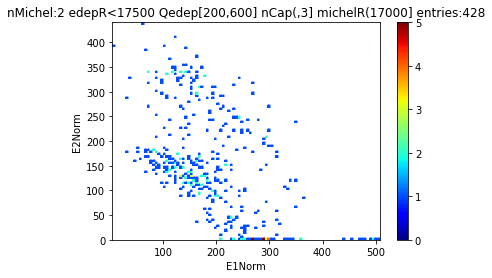

In [6]:
e1e2(sigres,'E1Norm','E2Norm',nm=2,name='sig')

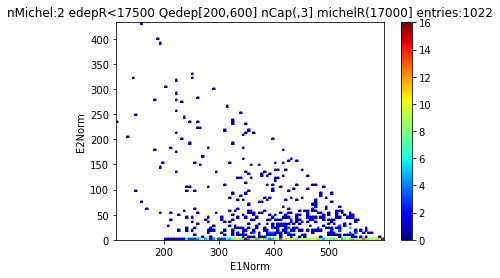

In [32]:
e1e2(bkgres,'E1Norm','E2Norm',nm=2,name='bkg')

In [19]:
def e1e2CHI(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=800,nRr=175000,t12=5.1,chi12=1.1,name='bkg'):
    index = (info['Qedep']>qel)&(info['Qedep']<qer)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['edepR']<eRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = (info['nMichel']==nm)&index
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(info['michelDist']<=mRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index &(info['nCap']>=nCr)
    #print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&(info['nDist']<nRr)
    #print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(((info['E2Norm']>85)&(info['E2Norm']<260))|((info['E2Norm']>=260)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    print('finish efficiency summary')
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<220))|((info['E2Norm']>=220)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&(info['Up90']>=8.5)&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['chisquare1']>info['chisquare2']*5)|((info['t2']-info['t1'])>37.5))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['nDist']<nRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    #print(info[index]['eid'])
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist(info[index]['Qedep'],bins=100)
    ax.set_title('Qedep distribution')
    ax.set_xlabel('{}/MeV'.format('Qedep'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100)
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chisquare1']/info[index]['chisquare2'],bins=100,range=[0,10])
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chisquare1']/info[index]['chisquare2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    fig,ax=plt.subplots()
    ax.hist(info[index]['michelDist'],bins=100)
    ax.set_title('michelDist distribution')
    ax.set_xlabel('{}/mm'.format('michelDist'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['nDist'],bins=100)
    ax.set_title('nCapture distribution')
    ax.set_xlabel('{}'.format('nCapture'))
    ax.set_ylabel('{}'.format('Entries'))
# nMichel=0,qEdep(200,600),eDepR(,17500],(chisquare>6.5|FitTime>=35),nCapture<=1,E1(30,200),E2(100,220)(361,430)
# sig: 151 0.0151
# bkg: 0

9472 433 21.875288683602772 0.9472
9390 433 21.68591224018476 0.939
428 433 0.9884526558891455 0.0428
423 433 0.976905311778291 0.0423
262 433 0.605080831408776 0.0262
255 433 0.5889145496535797 0.0255
221 433 0.5103926096997691 0.0221
finish efficiency summary
299 433 0.6905311778290993 0.0299
287 433 0.6628175519630485 0.0287
229 433 0.5288683602771362 0.0229
229 433 0.5288683602771362 0.0229
221 433 0.5103926096997691 0.0221
221 433 0.5103926096997691 0.0221
221 433 0.5103926096997691 0.0221


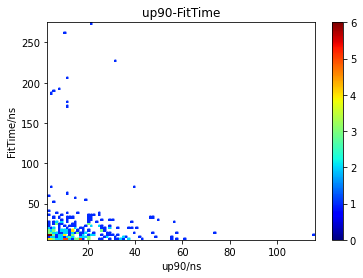

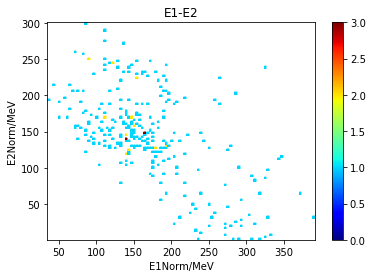

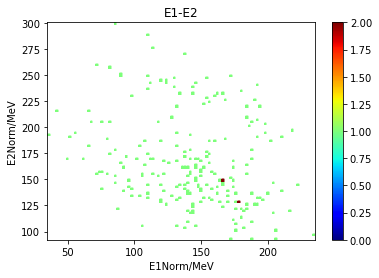

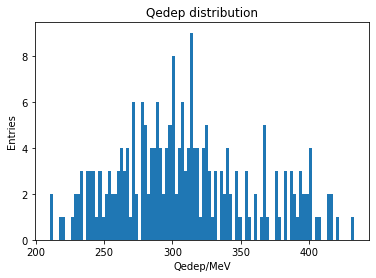

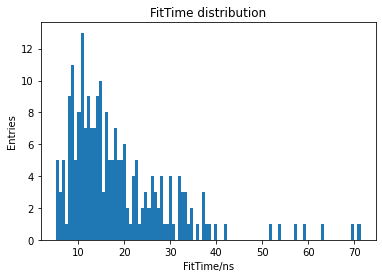

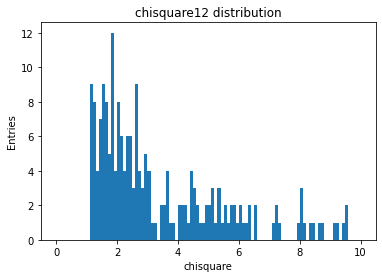

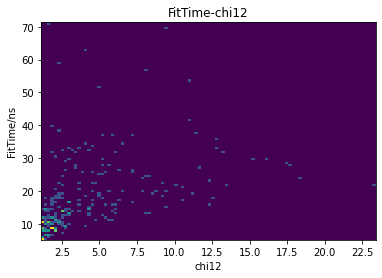

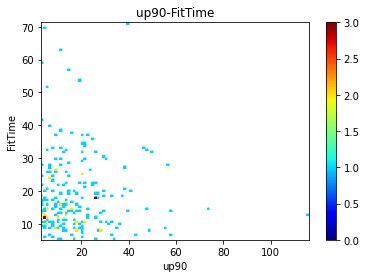

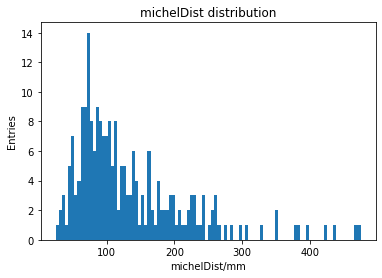

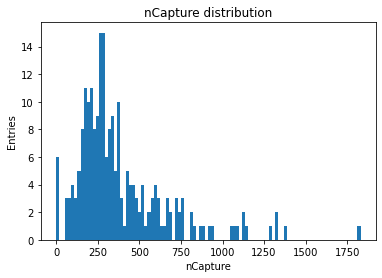

In [24]:
e1e2CHI(sigres,nm=2,nCr=100)

51299 3018 16.99768058316766 0.32063478173908694
47849 3018 15.85453943008615 0.299071203560178
1107 3018 0.3667992047713718 0.00691909595479774
995 3018 0.329688535453943 0.006219060953047652
328 3018 0.10868124585818423 0.002050102505125256
182 3018 0.060304837640821736 0.0011375568778438923
0 3018 0.0 0.0
finish efficiency summary
476 3018 0.15772034459907222 0.002975148757437872
278 3018 0.09211398277004638 0.0017375868793439672
2 3018 0.0006626905235255136 1.2500625031251562e-05
2 3018 0.0006626905235255136 1.2500625031251562e-05
0 3018 0.0 0.0
0 3018 0.0 0.0
0 3018 0.0 0.0


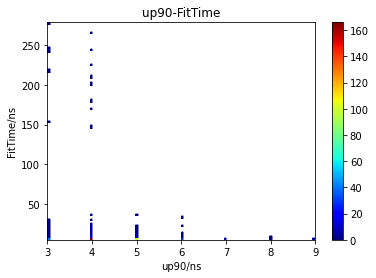

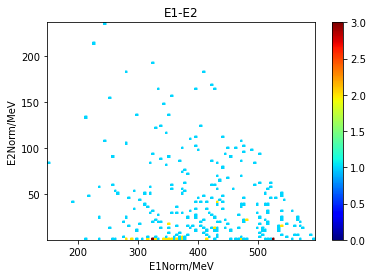

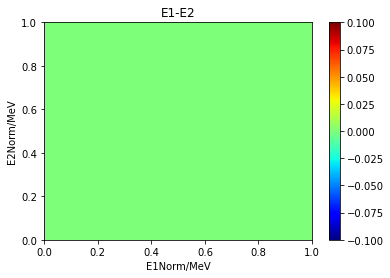

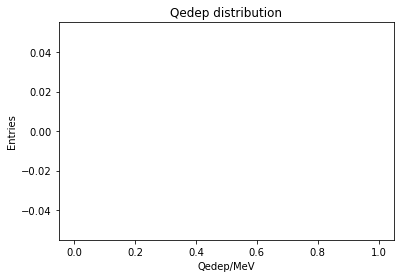

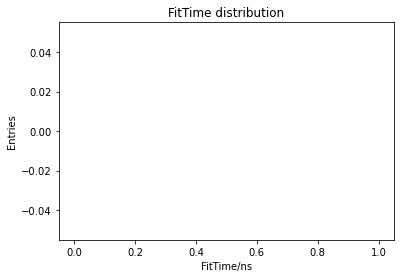

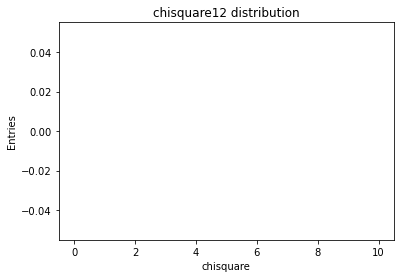

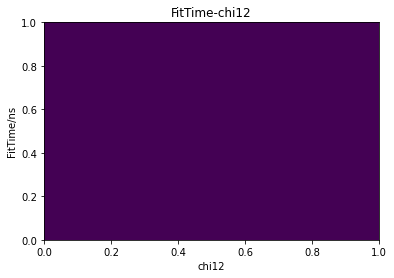

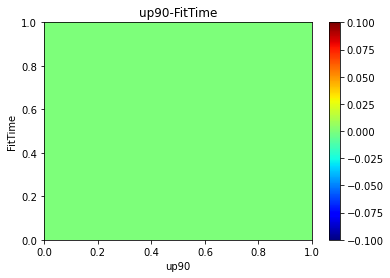

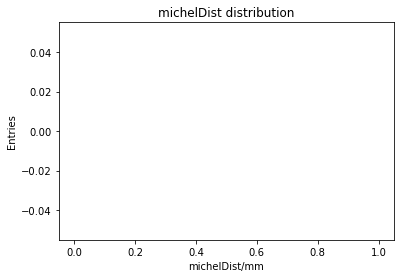

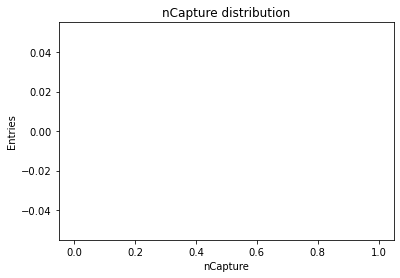

In [25]:
e1e2CHI(bkgres,nm=2,nCr=100)

In [27]:
import ROOT
index = (sigres['chisquare2']<sigres['chisquare1'])&(sigres['edepR']<17500)&(sigres['Qedep']<600)&(sigres['Qedep']>200)
hsig = ROOT.TH1F("sig", "sig", 100, 6, 206)
t=sigres[index]['t2']-sigres[index]['t1']
for i in t:
    hsig.Fill(i)

Warning in <TROOT::Append>: Replacing existing TH1: sig (Potential memory leak).


In [28]:
c = ROOT.TCanvas("c", "c", 600, 600)
hsig.Draw()
ROOT.gStyle.SetOptFit(1111)
fit = ROOT.TF1("f1","[0]*exp(-x/[1])",5,100);
fit.SetParLimits(1,6,30)
fit.SetParLimits(0,0,5000)
hsig.GetXaxis().SetTitle("t/ns")
hsig.GetYaxis().SetTitle("Entries")

hsig.Fit("f1","RP")
fit.Draw("same")
c.SaveAs('test.png')

 FCN=79.6613 FROM MIGRAD    STATUS=CONVERGED     181 CALLS         182 TOTAL
                     EDM=1.041e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.68243e+03   3.82118e+01   4.07395e-05  -2.44266e-03
   2  p1           1.16886e+01   1.43620e-01   3.54439e-05  -5.14720e-04


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: png file test.png has been created
